<a href="https://colab.research.google.com/github/MaxLinares/afg_/blob/main/afg_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# !pip uninstall pmdarima -y
# !pip install pmdarima
# !pip uninstall numpy -y
# !pip install numpy==1.26.4

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as pm


In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [21]:
train_months = pd.read_parquet("/content/train_months.parquet")
train_months.head()

,petroleo_brent,oro,cobre,gas_natural,plata,shanghai,dxy_fut,emergentes,ftse,dax,sp500,nikkei,vix,aapl,amd,amzn,brkb,dia,googl,jpm,msft,nvda,qqq,spy,tsm,unh,aem,ag,bhp,ctra,cvx,eqt,fcx,kgc,lng,nem,paas,scco,shel,wpm,xom,dolar_index,tasa_10y,tasa_2y,tasa_5y,pib_usa,pib_jpn,pib_deu,pib_gbr,pib_fra,pib_ita,pib_can,desempleo_usa,desempleo_ale,desempleo_fra,desempleo_ingl,desempleo_jpn,desempleo_can,desempleo_ita,desempleo_mex,produccion_petroleo_usa,produccion_gas_usa,dinero_circulante_eeuu_m2_aprox_lcu,dinero_circulante_china_m2_aprox_lcu,dinero_circulante_japon_m2_aprox_lcu,dinero_circulante_reino_unido_m2_aprox_lcu,dinero_circulante_india_m2_aprox_lcu,dinero_circulante_brasil_m2_aprox_lcu,dinero_circulante_mexico_m2_aprox_lcu
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-07-31,77.050003,666.900024,3.6535,6.191,12.950,4471.032227,80.660004,30.161293,6360.100098,7584.140137,1455.270020,17248.890625,23.520000,3.955451,13.54,3.9270,72.080002,87.783852,12.675341,27.574377,20.683052,0.699278,40.920063,103.608269,5.743544,37.946964,32.626858,4.245691,22.847242,6.124954,41.891644,21.234945,32.836269,11.177741,36.143723,28.910706,21.549908,17.108156,30.477816,11.346232,44.734661,93.4264,4.78,4.56,4.60,14215.651,527462.8,653550.2,407553.3,498529.2,424785.5,453080.3,4.6,8.5,8.0,5.3,3.7,6.1,6.0,3.411824,5180.0,1589702.0,8.741360e+12,2.424261e+13,1.036393e+15,1.427535e+12,2.059508e+13,1.102842e+12,2.313032e+12
2007-08-31,72.690002,673.000000,3.4110,5.468,12.063,5218.825195,80.745003,30.475266,6303.299805,7638.169922,1473.989990,16569.089844,23.379999,4.157187,13.00,3.9955,77.800003,88.796776,12.805820,27.893932,20.569405,0.781798,42.073715,104.937866,5.613395,39.184952,34.091782,3.070721,22.621557,5.976406,43.425461,22.268347,30.544228,10.523267,34.664146,29.263872,19.346025,16.234159,30.668137,9.417950,45.230057,93.6674,4.54,4.15,4.25,14215.651,527462.8,653550.2,407553.3,498529.2,424785.5,453080.3,4.6,8.4,8.0,5.3,3.7,6.0,6.2,3.653460,5180.0,1589702.0,8.741360e+12,2.424261e+13,1.036393e+15,1.427535e+12,2.059508e+13,1.102842e+12,2.313032e+12
2007-09-30,79.169998,742.799988,3.6305,6.870,13.794,5552.300781,77.625000,34.001698,6466.799805,7861.509766,1526.750000,16785.689453,18.000000,4.607186,13.20,4.6575,79.040001,92.623863,14.098706,28.708431,21.092054,0.830698,44.283485,109.000496,5.726569,37.946964,38.195057,3.949481,28.388855,6.302654,46.305305,23.481583,36.648186,12.900043,37.632885,31.047766,22.426802,19.100010,32.583153,11.602784,48.833488,90.9446,4.59,3.97,4.23,14215.651,527462.8,653550.2,407553.3,498529.2,424785.5,453080.3,4.6,8.4,8.0,5.3,3.7,6.0,6.2,3.653460,5180.0,1589702.0,8.741360e+12,2.424261e+13,1.036393e+15,1.427535e+12,2.059508e+13,1.102842e+12,2.313032e+12
2007-10-31,90.629997,792.000000,3.4680,8.330,14.377,5954.765137,76.459999,38.037766,6721.600098,8019.220215,1549.380005,16737.630859,18.530001,5.702321,13.08,4.4575,88.279999,92.752792,17.571501,29.686968,26.354319,0.810985,47.401691,110.479210,6.026476,38.511116,43.632866,4.601145,31.516684,7.114681,45.281033,25.496101,41.226879,16.947447,38.910702,35.330444,25.709345,21.547857,34.986965,13.961411,48.532753,89.1389,4.48,3.94,4.16,14715.058,527013.9,666127.0,415095.1,503917.9,424839.6,459773.3,4.7,8.3,7.7,5.2,4.0,6.0,6.3,3.771646,5180.0,1589702.0,8.741360e+12,2.424261e+13,1.036393e+15,1.427535e+12,2.059508e+13,1.102842e+12,2.313032e+12
2007-11-30,88.260002,782.200012,3.1570,7.302,13.963,4871.777832,76.169998,35.127888,6432.500000,7870.520020,1481.140015,15680.669922,22.870001,5.470266,9.76,4.5280,93.800003,89.813576,17.223551,28.815317,24.135643,0.722964,44.197365,106.200104,5.613395,43.094833,36.906536,4.206198,27.388372,6.174733,43.722458,24.023077,34.658165,14.940969,33.434372,34.490547,24.677235,17.328398,32.556175,12.388988,47.222553,89.6212,3.97,3.04,3.41,14715.058,527013.9,666127.0,415095.1,503917.9,424839.6,459773.3,4.7,8.2,7.5,5.2,3.8,6.1,6.3,3.649504,5180.0,1589702.0,8.741360e+12,2.424261e+13,1.036393e+15,1.427535e+12,2.059508e+13

In [22]:
train_months.columns

Index(['petroleo_brent', 'oro', 'cobre', 'gas_natural', 'plata', 'shanghai',
       'dxy_fut', 'emergentes', 'ftse', 'dax', 'sp500', 'nikkei', 'vix',
       'aapl', 'amd', 'amzn', 'brkb', 'dia', 'googl', 'jpm', 'msft', 'nvda',
       'qqq', 'spy', 'tsm', 'unh', 'aem', 'ag', 'bhp', 'ctra', 'cvx', 'eqt',
       'fcx', 'kgc', 'lng', 'nem', 'paas', 'scco', 'shel', 'wpm', 'xom',
       'dolar_index', 'tasa_10y', 'tasa_2y', 'tasa_5y', 'pib_usa', 'pib_jpn',
       'pib_deu', 'pib_gbr', 'pib_fra', 'pib_ita', 'pib_can', 'desempleo_usa',
       'desempleo_ale', 'desempleo_fra', 'desempleo_ingl', 'desempleo_jpn',
       'desempleo_can', 'desempleo_ita', 'desempleo_mex',
       'produccion_petroleo_usa', 'produccion_gas_usa',
       'dinero_circulante_eeuu_m2_aprox_lcu',
       'dinero_circulante_china_m2_aprox_lcu',
       'dinero_circulante_japon_m2_aprox_lcu',
       'dinero_circulante_reino_unido_m2_aprox_lcu',
       'dinero_circulante_india_m2_aprox_lcu',
       'dinero_circulante_brasil_m2_

In [23]:
# Colección desde archivos parquet
train_months = pd.read_parquet("/content/train_months.parquet")

oil_data_parquet = train_months[['petroleo_brent','xom','cvx']]
copper_data_parquet = train_months[['cobre','fcx','scco','bhp']]
silver_data_parquet = train_months[['plata','paas','wpm','ag']]
gold_data_parquet = train_months[['oro','nem','kgc','aem']]
natural_data_parquet = train_months[['gas_natural','eqt','ctra','lng']]

print("Oil Data:")
display(oil_data_parquet.head())

print("\nCopper Data:")
display(copper_data_parquet.head())

print("\nSilver Data:")
display(silver_data_parquet.head())

print("\nOro Data:")
display(gold_data_parquet.head())

print("\nNatural Gas Data:")
display(natural_data_parquet.head())

# DATOS PARA ENTRENAMIENTO MENSUAL
# Seteo de datos desde Parquet (y) - Seleccionar la columna de precio directamente para mantener el DatetimeIndex
oil_data = oil_data_parquet[['petroleo_brent']]
copper_data = copper_data_parquet[['cobre']]
silver_data = silver_data_parquet[['plata']]
gold_data = gold_data_parquet[['oro']]
natural_gas_data = natural_data_parquet[['gas_natural']]


# Seteo de datos desde Parquet (variables exogenas)
oil_data_exog = oil_data_parquet[['xom','cvx']].copy()
copper_data_exog = copper_data_parquet[['fcx','scco','bhp']].copy()
silver_data_exog = silver_data_parquet[['paas','wpm','ag']].copy()
gold_data_exog = gold_data_parquet[['nem','kgc','aem']].copy()
natural_gas_data_exog = natural_data_parquet[['eqt','ctra','lng']].copy()

# DATOS PARA TESTEO MENSUAL
test_months = pd.read_parquet("/content/test_months.parquet")

oil_monthly_test = test_months[['petroleo_brent','xom','cvx']]
copper_monthly_test = test_months[['cobre','fcx','scco','bhp']]
silver_monthly_test = test_months[['plata','paas','wpm','ag']]
gold_monthly_test = test_months[['oro','nem','kgc','aem']]
natural_gas_monthly_test = test_months[['gas_natural','eqt','ctra','lng']]

Oil Data:


,petroleo_brent,xom,cvx
Date,,,
2007-07-31,77.050003,44.734661,41.891644
2007-08-31,72.690002,45.230057,43.425461
2007-09-30,79.169998,48.833488,46.305305
2007-10-31,90.629997,48.532753,45.281033
2007-11-30,88.260002,47.222553,43.722458



Copper Data:


,cobre,fcx,scco,bhp
Date,,,,
2007-07-31,3.6535,32.836269,17.108156,22.847242
2007-08-31,3.4110,30.544228,16.234159,22.621557
2007-09-30,3.6305,36.648186,19.100010,28.388855
2007-10-31,3.4680,41.226879,21.547857,31.516684
2007-11-30,3.1570,34.658165,17.328398,27.388372



Silver Data:


,plata,paas,wpm,ag
Date,,,,
2007-07-31,12.950,21.549908,11.346232,4.245691
2007-08-31,12.063,19.346025,9.417950,3.070721
2007-09-30,13.794,22.426802,11.602784,3.949481
2007-10-31,14.377,25.709345,13.961411,4.601145
2007-11-30,13.963,24.677235,12.388988,4.206198



Oro Data:


,oro,nem,kgc,aem
Date,,,,
2007-07-31,666.900024,28.910706,11.177741,32.626858
2007-08-31,673.000000,29.263872,10.523267,34.091782
2007-09-30,742.799988,31.047766,12.900043,38.195057
2007-10-31,792.000000,35.330444,16.947447,43.632866
2007-11-30,782.200012,34.490547,14.940969,36.906536



Natural Gas Data:


,gas_natural,eqt,ctra,lng
Date,,,,
2007-07-31,6.191,21.234945,6.124954,36.143723
2007-08-31,5.468,22.268347,5.976406,34.664146
2007-09-30,6.870,23.481583,6.302654,37.632885
2007-10-31,8.330,25.496101,7.114681,38.910702
2007-11-30,7.302,24.023077,6.174733,33.434372



## Limpiar y procesar los datos de cada commodity

In [24]:
# Process Oil Data
num_records_original_oil = len(oil_data)
num_duplicate_records_oil = oil_data.duplicated().sum()
oil_data = oil_data.drop_duplicates()
num_nan_records_oil = oil_data[['petroleo_brent']].isnull().sum()
oil_data = oil_data[['petroleo_brent']].dropna()
# oil_monthly = oil_data.resample('ME').last().reset_index()
oil_monthly = oil_data.copy()
with open('registros_eliminados_oil.txt', 'w') as f:
    f.write(f'Cantidad de registros duplicados eliminados del DataFrame oil: {num_duplicate_records_oil}\n')
    f.write(f'Cantidad de registros con NaN en "petroleo_brent" eliminados del DataFrame oil: {num_nan_records_oil}\n')

# Process Copper Data
num_records_original_copper = len(copper_data)
num_duplicate_records_copper = copper_data.duplicated().sum()
copper_data = copper_data.drop_duplicates()
num_nan_records_copper = copper_data['cobre'].isnull().sum()
copper_data = copper_data[['cobre']].dropna()
# copper_monthly = copper_data.resample('ME').last().reset_index()
copper_monthly = copper_data.copy()
with open('registros_eliminados_copper.txt', 'w') as f:
    f.write(f'Cantidad de registros duplicados eliminados del DataFrame copper: {num_duplicate_records_copper}\n')
    f.write(f'Cantidad de registros con NaN en "cobre" eliminados del DataFrame copper: {num_nan_records_copper}\n')

# Process Silver Data
num_records_original_silver = len(silver_data)
num_duplicate_records_silver = silver_data.duplicated().sum()
silver_data = silver_data.drop_duplicates()
num_nan_records_silver = silver_data['plata'].isnull().sum()
silver_data = silver_data[['plata']].dropna()
# silver_monthly = silver_data.resample('ME').last().reset_index()
silver_monthly = silver_data.copy()
with open('registros_eliminados_silver.txt', 'w') as f:
    f.write(f'Cantidad de registros duplicados eliminados del DataFrame silver: {num_duplicate_records_silver}\n')
    f.write(f'Cantidad de registros con NaN en "plata" eliminados del DataFrame silver: {num_nan_records_silver}\n')

# Process Gold Data
num_records_original_gold = len(gold_data)
num_duplicate_records_gold = gold_data.duplicated().sum()
gold_data = gold_data.drop_duplicates()
num_nan_records_gold = gold_data['oro'].isnull().sum()
gold_data = gold_data[['oro']].dropna()
# gold_monthly = gold_data.resample('ME').last().reset_index()
gold_monthly = gold_data.copy()
with open('registros_eliminados_gold.txt', 'w') as f:
    f.write(f'Cantidad de registros duplicados eliminados del DataFrame gold: {num_duplicate_records_gold}\n')
    f.write(f'Cantidad de registros con NaN en "oro" eliminados del DataFrame gold: {num_nan_records_gold}\n')

# Process Natural Gas Data
num_records_original_natural_gas = len(natural_gas_data)
num_duplicate_records_natural_gas = natural_gas_data.duplicated().sum()
natural_gas_data = natural_gas_data.drop_duplicates()
num_nan_records_natural_gas = natural_gas_data['gas_natural'].isnull().sum()
natural_gas_data = natural_gas_data[['gas_natural']].dropna()
# natural_gas_monthly = natural_gas_data.resample('ME').last().reset_index()
natural_gas_monthly = natural_gas_data.copy()
with open('registros_eliminados_natural_gas.txt', 'w') as f:
    f.write(f'Cantidad de registros duplicados eliminados del DataFrame natural_gas: {num_duplicate_records_natural_gas}\n')
    f.write(f'Cantidad de registros con NaN en "gas_natural" eliminados del DataFrame natural_gas: {num_nan_records_natural_gas}\n')

print("Cleaning and resampling complete for all commodities.")

Cleaning and resampling complete for all commodities.


## Realizar la descomposición de cada serie

Aplicar la descomposición aditiva y multiplicativa a cada serie temporal de los commodities (petróleo, cobre, plata, oro y gas natural) que han sido remuestreadas mensualmente.


In [25]:
# Additive decomposition for each commodity
result_additive_oil = seasonal_decompose(oil_monthly['petroleo_brent'], model='additive', period=12)
result_additive_copper = seasonal_decompose(copper_monthly['cobre'], model='additive', period=12)
result_additive_silver = seasonal_decompose(silver_monthly['plata'], model='additive', period=12)
result_additive_gold = seasonal_decompose(gold_monthly['oro'], model='additive', period=12)
result_additive_natural_gas = seasonal_decompose(natural_gas_monthly['gas_natural'], model='additive', period=12)

# Multiplicative decomposition for each commodity
result_multiplicative_oil = seasonal_decompose(oil_monthly['petroleo_brent'], model='multiplicative', period=12)
result_multiplicative_copper = seasonal_decompose(copper_monthly['cobre'], model='multiplicative', period=12)
result_multiplicative_silver = seasonal_decompose(silver_monthly['plata'], model='multiplicative', period=12)
result_multiplicative_gold = seasonal_decompose(gold_monthly['oro'], model='multiplicative', period=12)
result_multiplicative_natural_gas = seasonal_decompose(natural_gas_monthly['gas_natural'], model='multiplicative', period=12)

print("Additive and multiplicative decomposition applied to all monthly commodity series.")

Additive and multiplicative decomposition applied to all monthly commodity series.


## Visualizar los resultados de la descomposición

Mostrar los gráficos de descomposición aditiva y multiplicativa para cada commodity (petróleo, cobre, plata, oro y gas natural) para analizar sus componentes: tendencia, estacionalidad y residuos.


<Figure size 1800x1500 with 0 Axes>

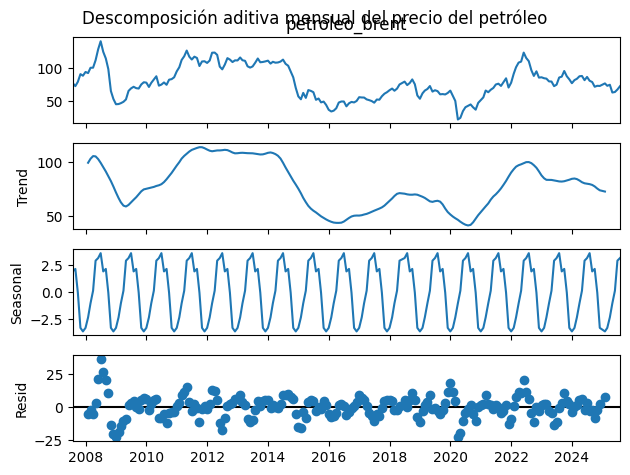

<Figure size 1800x1500 with 0 Axes>

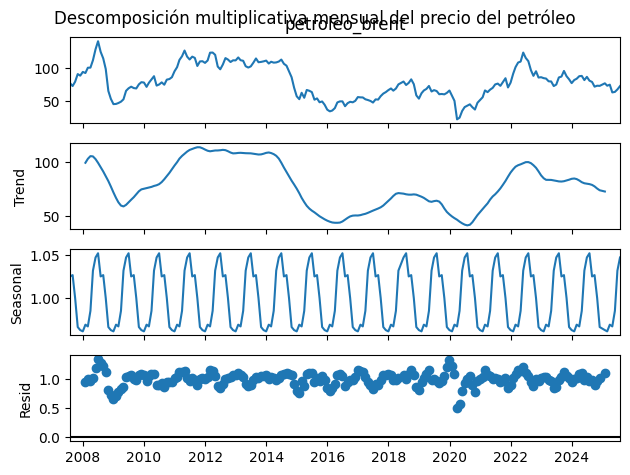

<Figure size 1800x1500 with 0 Axes>

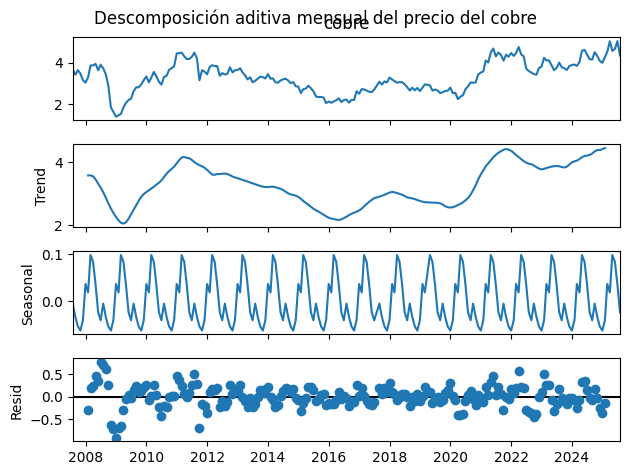

<Figure size 1800x1500 with 0 Axes>

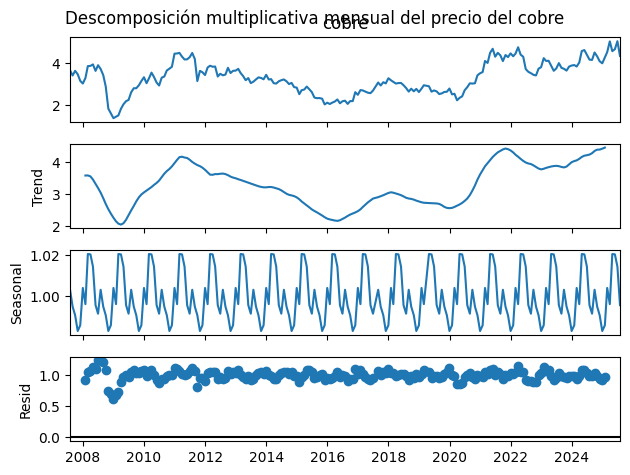

<Figure size 1800x1500 with 0 Axes>

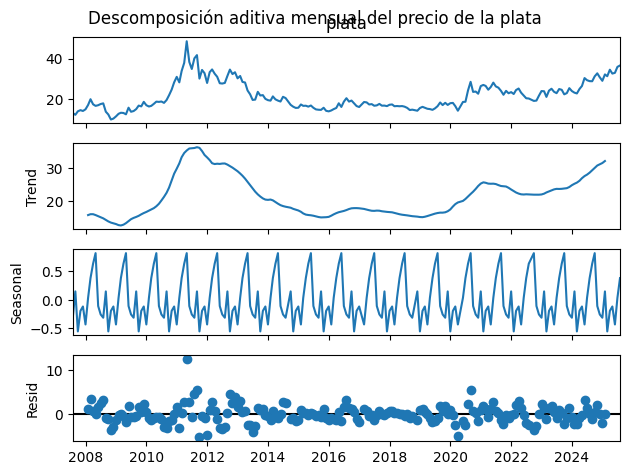

<Figure size 1800x1500 with 0 Axes>

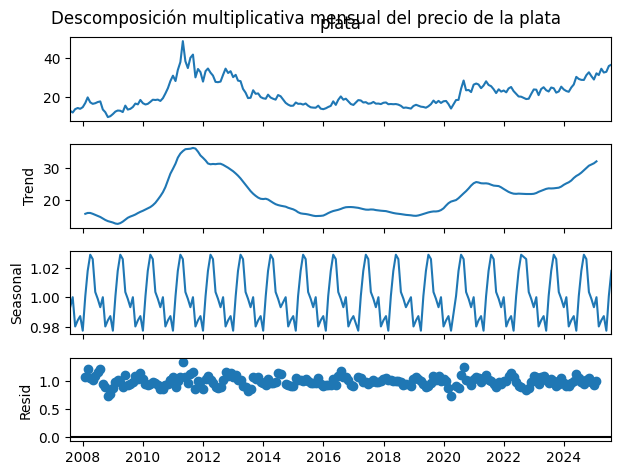

<Figure size 1800x1500 with 0 Axes>

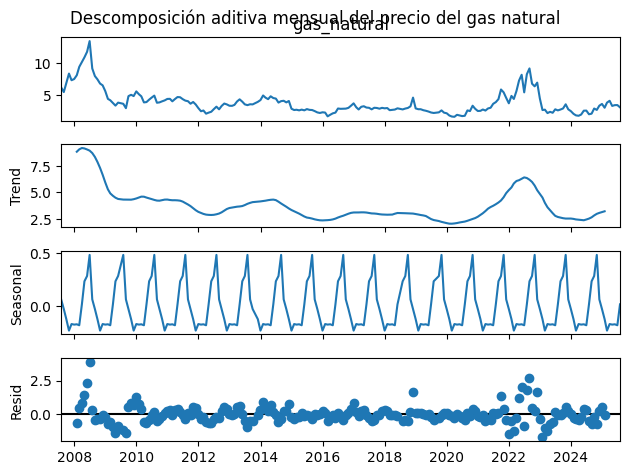

<Figure size 1800x1500 with 0 Axes>

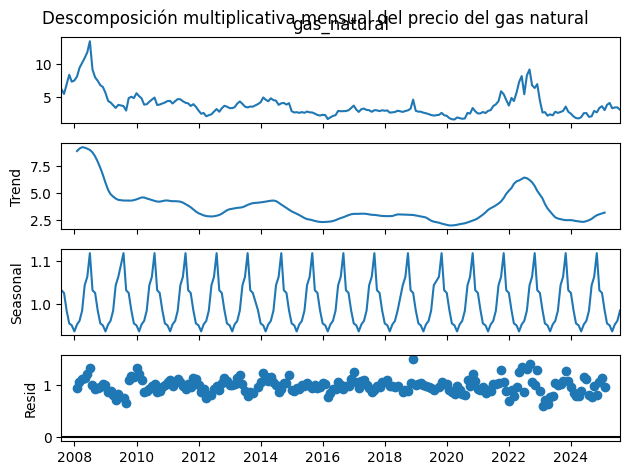

In [26]:
plt.figure(figsize=(18, 15))
result_additive_oil.plot()
plt.suptitle('Descomposición aditiva mensual del precio del petróleo')
plt.show()

plt.figure(figsize=(18, 15))
result_multiplicative_oil.plot()
plt.suptitle('Descomposición multiplicativa mensual del precio del petróleo')
plt.show()

plt.figure(figsize=(18, 15))
result_additive_copper.plot()
plt.suptitle('Descomposición aditiva mensual del precio del cobre')
plt.show()

plt.figure(figsize=(18, 15))
result_multiplicative_copper.plot()
plt.suptitle('Descomposición multiplicativa mensual del precio del cobre')
plt.show()

plt.figure(figsize=(18, 15))
result_additive_silver.plot()
plt.suptitle('Descomposición aditiva mensual del precio de la plata')
plt.show()

plt.figure(figsize=(18, 15))
result_multiplicative_silver.plot()
plt.suptitle('Descomposición multiplicativa mensual del precio de la plata')
plt.show()

plt.figure(figsize=(18, 15))
result_additive_natural_gas.plot()
plt.suptitle('Descomposición aditiva mensual del precio del gas natural')
plt.show()

plt.figure(figsize=(18, 15))
result_multiplicative_natural_gas.plot()
plt.suptitle('Descomposición multiplicativa mensual del precio del gas natural')
plt.show()

# ¿Qué modelo es mejor: multiplicativo o aditivo?

In [27]:
def choose_decomposition_model(series, period=12):
    """
    Compares additive and multiplicative decomposition models based on residual variance.

    Args:
        series (pd.Series): The time series data.
        period (int): The period of the seasonality.

    Returns:
        str: 'additive' or 'multiplicative' indicating the preferred model.
    """
    try:
        result_additive = seasonal_decompose(series, model='additive', period=period)
        resid_additive = result_additive.resid.dropna()
        variance_additive = resid_additive.var()
    except Exception as e:
        print(f"Error with additive decomposition: {e}")
        variance_additive = float('inf') # Assign a very large value in case of error

    try:
        result_multiplicative = seasonal_decompose(series, model='multiplicative', period=period)
        resid_multiplicative = result_multiplicative.resid.dropna()
        variance_multiplicative = resid_multiplicative.var()
    except Exception as e:
         print(f"Error with multiplicative decomposition: {e}")
         variance_multiplicative = float('inf') # Assign a very large value in case of error


    if variance_additive < variance_multiplicative:
        return 'additive'
    else:
        return 'multiplicative'

# Determine the best model for each commodity
oil_model = choose_decomposition_model(oil_monthly.iloc[:, 0])
copper_model = choose_decomposition_model(copper_monthly.iloc[:, 0])
silver_model = choose_decomposition_model(silver_monthly.iloc[:, 0])
gold_model = choose_decomposition_model(gold_monthly.iloc[:, 0])
natural_gas_model = choose_decomposition_model(natural_gas_monthly.iloc[:, 0])

print(f"Mejor modelo para el petróleo: {oil_model}")
print(f"Mejor modelo para el cobre: {copper_model}")
print(f"Mejor modelo para la plata: {silver_model}")
print(f"Mejor modelo para el oro: {gold_model}")
print(f"Mejor modelo para el gas natural: {natural_gas_model}")

Mejor modelo para el petróleo: multiplicative
Mejor modelo para el cobre: multiplicative
Mejor modelo para la plata: multiplicative
Mejor modelo para el oro: multiplicative
Mejor modelo para el gas natural: multiplicative


El hecho de que el modelo multiplicativo sea el mejor para cada commodity sugiere que la estacionalidad y los residuos son proporcionales al nivel de la serie. Esto significa que a medida que el precio del commodity aumenta, la magnitud de las fluctuaciones estacionales y el ruido aleatorio también tienden a aumentar.

Para análisis posteriores, especialmente si planeas usar modelos que asumen aditividad o varianza constante (como muchos modelos de pronóstico), puede ser beneficioso aplicar una transformación a la serie temporal, como tomar el logaritmo natural. Tomar el logaritmo puede ayudar a estabilizar la varianza y hacer que la relación entre los componentes sea más aditiva.

Después de aplicar la transformación, podrías realizar la descomposición aditiva en la serie transformada y luego usar los resultados para tu análisis o modelado. Si no aplicas una transformación, debes tener en cuenta la naturaleza multiplicativa al interpretar los resultados de la descomposición y al elegir modelos de pronóstico adecuados.

## Transformación de los datos
Aplica una transformación logarítmica a las series temporales mensuales de los commodities para estabilizar la varianza y hacer que la relación sea más aditiva.


In [47]:
# 1. No cambiar tipo, seguir con DataFrame copia
oil_monthly = oil_data.copy()
copper_monthly = copper_data.copy()
silver_monthly = silver_data.copy()
gold_monthly = gold_data.copy()
natural_gas_monthly = natural_gas_data.copy()

# # 2. Crear la columna logarítmica para cada DataFrame
# oil_monthly['Close_log'] = np.log(oil_monthly['petroleo_brent'])
# copper_monthly['Close_log'] = np.log(copper_monthly['cobre'])
# silver_monthly['Close_log'] = np.log(silver_monthly['plata'])
# gold_monthly['Close_log'] = np.log(gold_monthly['oro'])
# natural_gas_monthly['Close_log'] = np.log(natural_gas_monthly['gas_natural'])

# # 3. Mantener solo la columna 'Close_log' y el índice original
# oil_monthly = oil_monthly[['Close_log']].copy()
# copper_monthly = copper_monthly[['Close_log']].copy()
# silver_monthly = silver_monthly[['Close_log']].copy()
# gold_monthly = gold_monthly[['Close_log']].copy()
# natural_gas_monthly = natural_gas_monthly[['Close_log']].copy()

print("Logarithmic transformation applied to the 'Close' column of all monthly commodity dataframes.")

Logarithmic transformation applied to the 'Close' column of all monthly commodity dataframes.


## División de los datos

Divide cada serie temporal (transformada logarítmicamente) en conjuntos de entrenamiento y prueba.


In [29]:
# Los datos de entrenamiento y prueba ya fueron cargados desde archivos parquet en celdas anteriores.
# Solo necesitamos seleccionar las columnas de interés para los conjuntos de entrenamiento y prueba.

# Seleccionar la columna de interés para los conjuntos de entrenamiento (usando datos transformados si aplica)
# Asegurarnos de que el índice sea el DatetimeIndex
oil_train = oil_monthly[['Close_log']].copy()
copper_train = copper_monthly[['Close_log']].copy()
silver_train = silver_monthly[['Close_log']].copy()
gold_train = gold_monthly[['Close_log']].copy()
natural_gas_train = natural_gas_monthly[['Close_log']].copy()

# Seleccionar la columna de interés para los conjuntos de prueba (usando datos transformados si aplica)
# Asegurarnos de que el índice sea el DatetimeIndex
# Nota: Los datos de prueba provienen de test_months, que también debe ser transformado si train_months lo fue.
# Asumiendo que test_months también debería tener una columna 'Close_log' si train_months la tiene.
# Si test_months no tiene 'Close_log', necesitaremos aplicar la transformación logarítmica primero.
# Basándonos en el contexto, test_months_parquet tiene las mismas columnas originales,
# por lo que aplicaremos la transformación logarítmica a las columnas de precio relevantes en test_months.

# Aplicar transformación logarítmica a las columnas de precio en test_months si es necesario
if 'Close_log' not in test_months.columns:
    test_months['petroleo_brent_log'] = np.log(test_months['petroleo_brent'])
    test_months['cobre_log'] = np.log(test_months['cobre'])
    test_months['plata_log'] = np.log(test_months['plata'])
    test_months['oro_log'] = np.log(test_months['oro'])
    test_months['gas_natural_log'] = np.log(test_months['gas_natural'])


oil_test = test_months['petroleo_brent_log']
copper_test = test_months['cobre_log']
silver_test = test_months['plata_log']
gold_test = test_months['oro_log']
natural_gas_test = test_months['gas_natural_log']


print("Data successfully assigned to training and testing sets for all commodities.")
print("\nTraining and Test set sizes:")
print(f"Oil Train: {len(oil_train)}, Oil Test: {len(oil_test)}")
print(f"Copper Train: {len(copper_train)}, Copper Test: {len(copper_test)}")
print(f"Silver Train: {len(silver_train)}, Silver Test: {len(silver_test)}")
print(f"Gold Train: {len(gold_train)}, Gold Test: {len(gold_test)}")
print(f"Natural Gas Train: {len(natural_gas_train)}, Natural Gas Test: {len(natural_gas_test)}")

Data successfully assigned to training and testing sets for all commodities.

Training and Test set sizes:
Oil Train: 215, Oil Test: 3
Copper Train: 215, Copper Test: 3
Silver Train: 212, Silver Test: 3
Gold Train: 216, Gold Test: 3
Natural Gas Train: 213, Natural Gas Test: 3


## Evaluación del modelo final mensual

Evaluar el rendimiento del modelo SARIMAX final entrenado utilizando los datos de prueba mensuales.

## Entrenamiento del modelo

El método pm.auto_arima() de la librería pmdarima permite ajustar automáticamente un modelo ARIMA óptimo para una serie temporal, y acepta varios parámetros para controlar este proceso. Los principales parámetros que puedes usar, incluyendo los que ya tienes en tu código, son:



*   y (primer argumento): la serie temporal de entrada.
*   seasonal (bool): indica si el modelo debe considerar estacionalidad. True si la serie tiene patrón estacional.
*  m (int): periodo estacional. Por ejemplo, m=12 para datos mensuales con ciclo anual.
*   test (str): prueba estadística para determinar estacionariedad, por ejemplo "adf" para Dickey-Fuller aumentado.

*   trace (bool): muestra el progreso del ajuste.

*  error_action (str): qué hacer en caso de error, como "ignore" para ignorar.

*  suppress_warnings (bool): suprime mensajes de advertencia.

*  stepwise (bool): activa una búsqueda eficiente en lugar de exhaustiva.

Parámetros para control más fino de la búsqueda de modelos:

*  start_p, max_p: rango para el parámetro p (orden autorregresivo).

*  start_q, max_q: rango para el parámetro q (orden media móvil).

*  d: orden de diferenciación (puede dejarse que lo calcule el método).

*  D: orden de diferenciación estacional.

*  start_P, max_P, start_Q, max_Q: rangos para parámetros estacionales P y Q.

*  max_order: máximo orden total permitido (p+q+P+Q).

*  information_criterion: criterio para selección de modelo, ej. "aic", "bic".

*  seasonal_test: prueba para determinar la estacionalidad.

*  with_intercept: si incluir un intercepto en el modelo.

*  n_jobs: número de hilos para la búsqueda paralela.

*  scoring: función para evaluar modelos (ej. AIC, BIC).

También puedes pasar:

*  exogenous: datos exógenos si el modelo es ARIMAX.

*  max_d, max_D: límites máximos para diferenciación.

En resumen, tu código usa los parámetros básicos para un modelo estacional mensual con búsqueda eficiente y prueba ADF para estacionariedad. Para ajustar más, puedes especificar límites para p, q, P, Q, d, D, criterio de información, intercepto, y exógenos según necesidad

In [53]:
# warning off
import warnings
warnings.filterwarnings("ignore")

def find_best_sarima_params(ts_data, seasonal_period=12):
    """
    Finds the best SARIMA parameters for a time series using auto_arima.

    Args:
        ts_data (pd.Series): The time series data (log-transformed).
        seasonal_period (int): The period of the seasonality.

    Returns:
        pmdarima.arima.arima.ARIMA: The best SARIMA model found.
    """
    best_model = pm.auto_arima(ts_data,
                              seasonal=True,       # Consider seasonality
                              m=seasonal_period,   # Seasonal period
                              test='adf',          # Stationarity test
                              trace=True,          # Show progress
                              error_action='ignore', # Ignore errors
                              suppress_warnings=True, # Suppress warnings
                              information_criterion= "bic",
                              n_jobs=-1,    # Para usar todos los núcleos del CPU disponibles para paralelizar las tareas
                              max_d=1,  # Diferenciación máxima
                              max_D=1,  #Diferenciación máxima
                              max_P=2,
                              max_p=2,
                              max_q=2,
                              max_Q=2,
                               stepwise=True)       # Use stepwise search
    return best_model

# Example usage (you would call this function for each commodity's training data)
best_oil_model = find_best_sarima_params(oil_train)
best_copper_model = find_best_sarima_params(copper_train)
best_silver_model = find_best_sarima_params(silver_train)
best_gold_model = find_best_sarima_params(gold_train)
best_natural_gas_model = find_best_sarima_params(natural_gas_train)


Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : BIC=-320.683, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : BIC=-339.218, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : BIC=-338.591, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : BIC=-338.380, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : BIC=-344.583, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : BIC=-334.136, Time=0.08 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : BIC=-334.165, Time=0.14 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : BIC=-329.175, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : BIC=-343.879, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : BIC=-343.663, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : BIC=-338.641, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 2.160 seconds
Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : BIC=-479.610, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[12] interce

In [31]:
print(best_oil_model.summary(),"\n")
print("+"*100)
print(best_copper_model.summary(),"\n")
print("+"*100)
print(best_silver_model.summary(),"\n")
print("+"*100)
print(best_gold_model.summary(),"\n")
print("+"*100)
print(best_natural_gas_model.summary(),"\n")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  215
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 174.974
Date:                Sat, 01 Nov 2025   AIC                           -347.949
Time:                        17:22:49   BIC                           -344.583
Sample:                             0   HQIC                          -346.588
                                - 215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0114      0.000     29.503      0.000       0.011       0.012
Ljung-Box (L1) (Q):                   9.95   Jarque-Bera (JB):              1973.21
Prob(Q):                              0.00   Pr

In [54]:
print(best_oil_model.order[0]) # Order autoregresivo p
print(best_oil_model.order[1]) # Order de diferenciación d
print(best_oil_model.order[2]) # Order media móvil q
print(best_oil_model.seasonal_order[0]) # Order autoregresivo estacional P
print(best_oil_model.seasonal_order[1]) # Order de diferenciación estacional D
print(best_oil_model.seasonal_order[2]) # Order media móvil estacional Q
print(best_oil_model.seasonal_order[3]) # Periodo estacional

0
1
0
0
0
0
12


In [55]:
# Define initial SARIMA parameters (p, d, q)x(P, D, Q, S)
# These are starting points and can be optimized further

# Train SARIMA model for Oil
sarima_order = (best_oil_model.order[0], best_oil_model.order[1], best_oil_model.order[2])
seasonal_order = (best_oil_model.seasonal_order[0], best_oil_model.seasonal_order[1], best_oil_model.seasonal_order[2], best_oil_model.seasonal_order[3])
sarima_model_oil = SARIMAX(oil_train, order=sarima_order, seasonal_order=seasonal_order)
results_sarima_oil = sarima_model_oil.fit()
print("SARIMA model trained for Oil.")

# Train SARIMA model for Copper
sarima_order = (best_copper_model.order[0], best_copper_model.order[1], best_copper_model.order[2])
seasonal_order = (best_copper_model.seasonal_order[0], best_copper_model.seasonal_order[1], best_copper_model.seasonal_order[2], best_copper_model.seasonal_order[3])
sarima_model_copper = SARIMAX(copper_train, order=sarima_order, seasonal_order=seasonal_order)
results_sarima_copper = sarima_model_copper.fit()
print("SARIMA model trained for Copper.")

# Train SARIMA model for Silver
sarima_order = (best_silver_model.order[0], best_silver_model.order[1], best_silver_model.order[2])
seasonal_order = (best_silver_model.seasonal_order[0], best_silver_model.seasonal_order[1], best_silver_model.seasonal_order[2], best_silver_model.seasonal_order[3])
sarima_model_silver = SARIMAX(silver_train, order=sarima_order, seasonal_order=seasonal_order)
results_sarima_silver = sarima_model_silver.fit()
print("SARIMA model trained for Silver.")

# Train SARIMA model for Gold
sarima_order = (best_gold_model.order[0], best_gold_model.order[1], best_gold_model.order[2])
seasonal_order = (best_gold_model.seasonal_order[0], best_gold_model.seasonal_order[1], best_gold_model.seasonal_order[2], best_gold_model.seasonal_order[3])
sarima_model_gold = SARIMAX(gold_train, order=sarima_order, seasonal_order=seasonal_order)
results_sarima_gold = sarima_model_gold.fit()
print("SARIMA model trained for Gold.")

# Train SARIMA model for Natural Gas
sarima_order = (best_natural_gas_model.order[0], best_natural_gas_model.order[1], best_natural_gas_model.order[2])
seasonal_order = (best_natural_gas_model.seasonal_order[0], best_natural_gas_model.seasonal_order[1], best_natural_gas_model.seasonal_order[2], best_natural_gas_model.seasonal_order[3])
sarima_model_natural_gas = SARIMAX(natural_gas_train, order=sarima_order, seasonal_order=seasonal_order)
results_sarima_natural_gas = sarima_model_natural_gas.fit()
print("SARIMA model trained for Natural Gas.")

SARIMA model trained for Oil.
SARIMA model trained for Copper.
SARIMA model trained for Silver.
SARIMA model trained for Gold.
SARIMA model trained for Natural Gas.


## Evaluación del modelo

Evaluar el rendimiento del modelo SARIMA entrenado utilizando los datos de prueba para cada commodity.


In [56]:
# Generate predictions and evaluate for Oil
oil_predictions = results_sarima_oil.predict(start=len(oil_train), end=len(oil_train) + len(oil_test) - 1)
mse_oil = mean_squared_error(oil_test, oil_predictions)
rmse_oil = np.sqrt(mse_oil)
mae_oil = mean_absolute_error(oil_test, oil_predictions)

print(f"Oil - MSE: {mse_oil:.4f}, RMSE: {rmse_oil:.4f}, MAE: {mae_oil:.4f}")

# Generate predictions and evaluate for Copper
copper_predictions = results_sarima_copper.predict(start=len(copper_train), end=len(copper_train) + len(copper_test) - 1)
mse_copper = mean_squared_error(copper_test, copper_predictions)
rmse_copper = np.sqrt(mse_copper)
mae_copper = mean_absolute_error(copper_test, copper_predictions)

print(f"Copper - MSE: {mse_copper:.4f}, RMSE: {rmse_copper:.4f}, MAE: {mae_copper:.4f}")

# Generate predictions and evaluate for Silver
silver_predictions = results_sarima_silver.predict(start=len(silver_train), end=len(silver_train) + len(silver_test) - 1)
mse_silver = mean_squared_error(silver_test, silver_predictions)
rmse_silver = np.sqrt(mse_silver)
mae_silver = mean_absolute_error(silver_test, silver_predictions)

print(f"Silver - MSE: {mse_silver:.4f}, RMSE: {rmse_silver:.4f}, MAE: {mae_silver:.4f}")

# Generate predictions and evaluate for Gold
gold_predictions = results_sarima_gold.predict(start=len(gold_train), end=len(gold_train) + len(gold_test) - 1)
mse_gold = mean_squared_error(gold_test, gold_predictions)
rmse_gold = np.sqrt(mse_gold)
mae_gold = mean_absolute_error(gold_test, gold_predictions)

print(f"Gold - MSE: {mse_gold:.4f}, RMSE: {rmse_gold:.4f}, MAE: {mae_gold:.4f}")

# Generate predictions and evaluate for Natural Gas
natural_gas_predictions = results_sarima_natural_gas.predict(start=len(natural_gas_train), end=len(natural_gas_train) + len(natural_gas_test) - 1)
mse_natural_gas = mean_squared_error(natural_gas_test, natural_gas_predictions)
rmse_natural_gas = np.sqrt(mse_natural_gas)
mae_natural_gas = mean_absolute_error(natural_gas_test, natural_gas_predictions)

print(f"Natural Gas - MSE: {mse_natural_gas:.4f}, RMSE: {rmse_natural_gas:.4f}, MAE: {mae_natural_gas:.4f}")

Oil - MSE: 0.0086, RMSE: 0.0930, MAE: 0.0891
Copper - MSE: 0.0148, RMSE: 0.1217, MAE: 0.1083
Silver - MSE: 0.0444, RMSE: 0.2107, MAE: 0.1976
Gold - MSE: 0.0212, RMSE: 0.1457, MAE: 0.1333
Natural Gas - MSE: 0.0023, RMSE: 0.0475, MAE: 0.0462


## Pronóstico

Generar pronósticos futuros utilizando el modelo SARIMA entrenado para cada commodity.


In [57]:
# Specify the number of future time steps for forecasting (e.g., 24 months)
n_forecast = 3

# Generate future forecasts for each commodity
oil_future_forecast = results_sarima_oil.forecast(steps=n_forecast)
copper_future_forecast = results_sarima_copper.forecast(steps=n_forecast)
silver_future_forecast = results_sarima_silver.forecast(steps=n_forecast)
gold_future_forecast = results_sarima_gold.forecast(steps=n_forecast)
natural_gas_future_forecast = results_sarima_natural_gas.forecast(steps=n_forecast)

print(f"Future forecasts generated for {n_forecast} months for all commodities.")

Future forecasts generated for 3 months for all commodities.


## Inversión de la transformación (si se aplicó)

Invertir la transformación logarítmica aplicada a los pronósticos para obtener los valores en la escala original de los precios de los commodities.


In [62]:
oil_future_forecast_original = np.exp(oil_future_forecast)
copper_future_forecast_original = np.exp(copper_future_forecast)
silver_future_forecast_original = np.exp(silver_future_forecast)
gold_future_forecast_original = np.exp(gold_future_forecast)
natural_gas_future_forecast_original = np.exp(natural_gas_future_forecast)

# oil_future_forecast_original = oil_future_forecast
# copper_future_forecast_original = copper_future_forecast
# silver_future_forecast_original = silver_future_forecast
# gold_future_forecast_original = gold_future_forecast
# natural_gas_future_forecast_original = natural_gas_future_forecast

print("Oil Future Forecast (Original Scale):")
display(oil_future_forecast_original.head())

print("\nCopper Future Forecast (Original Scale):")
display(copper_future_forecast_original.head())

print("\nSilver Future Forecast (Original Scale):")
display(silver_future_forecast_original.head())

print("\nGold Future Forecast (Original Scale):")
display(gold_future_forecast_original.head())

print("\nNatural Gas Future Forecast (Original Scale):")
display(natural_gas_future_forecast_original.head())

Oil Future Forecast (Original Scale):


,predicted_mean
215,72.529999
216,72.529999
217,72.529999



Copper Future Forecast (Original Scale):


,predicted_mean
215,4.3305
216,4.3305
217,4.3305



Silver Future Forecast (Original Scale):


,predicted_mean
212,36.551998
213,36.551998
214,36.551998



Gold Future Forecast (Original Scale):


,predicted_mean
216,3293.199951
217,3293.199951
218,3293.199951



Natural Gas Future Forecast (Original Scale):


,predicted_mean
213,3.106
214,3.106
215,3.106


In [46]:
natural_gas_predictions.head()

,predicted_mean
213,1.133336
214,1.133336
215,1.133336


## Visualización de resultados

Visualizar los datos originales, los datos de entrenamiento, los datos de prueba y los pronósticos para cada commodity. Graficar los datos en su escala original.


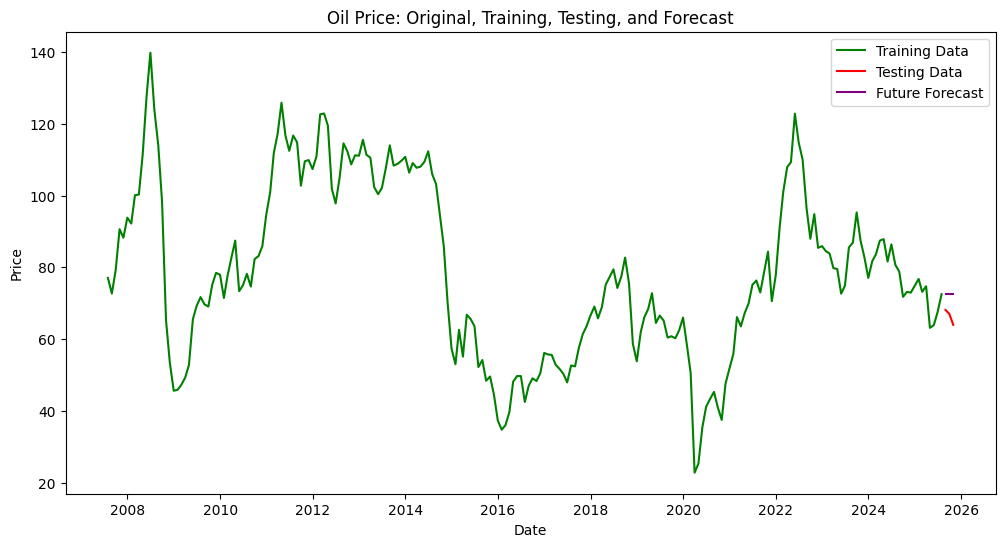

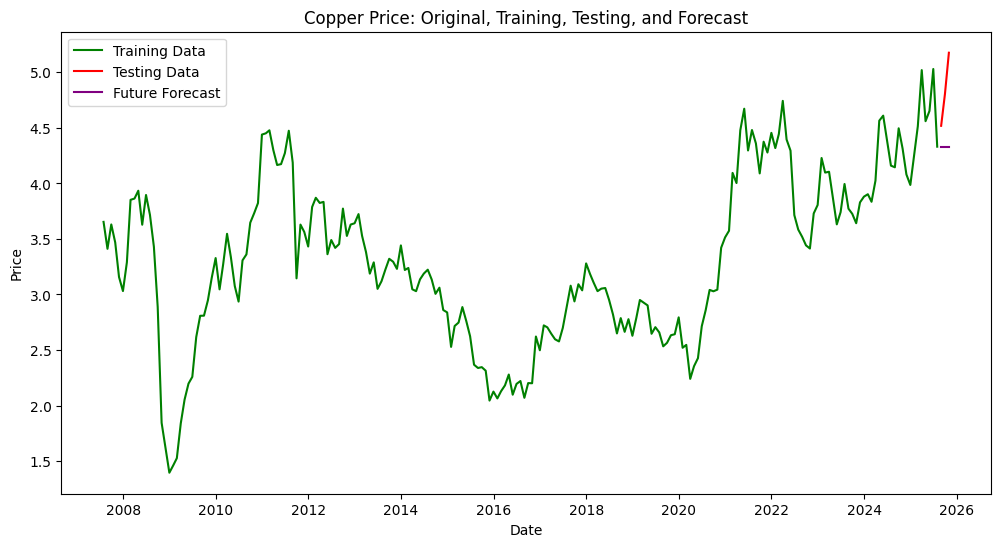

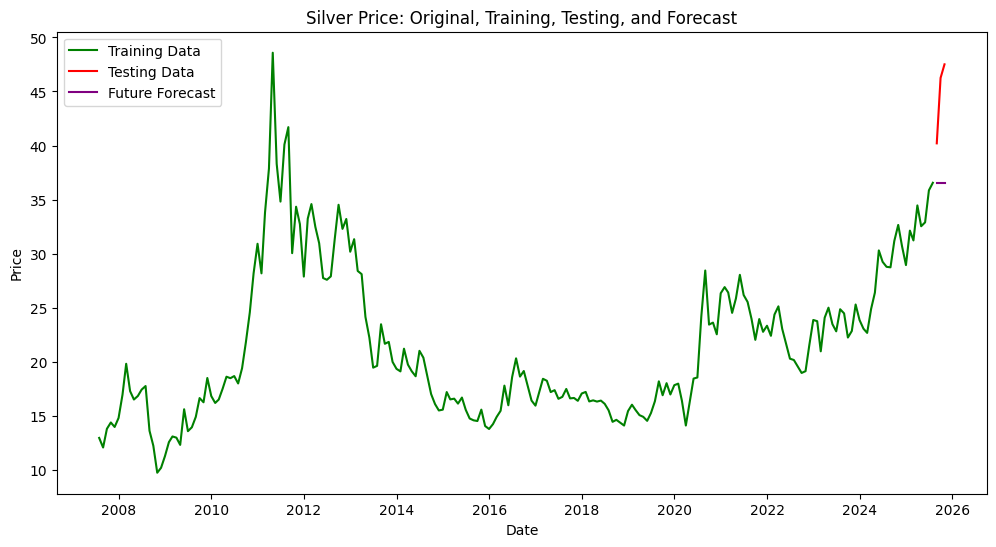

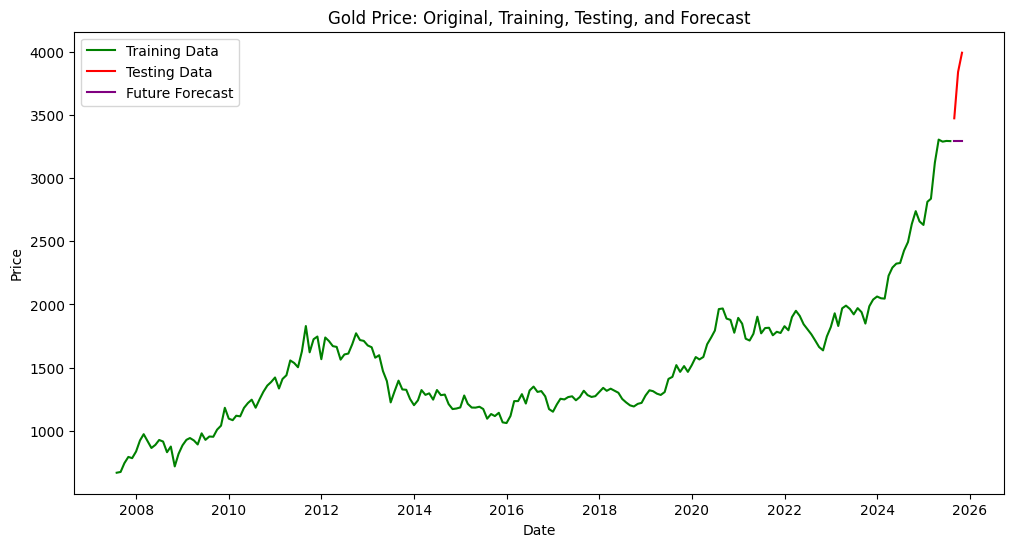

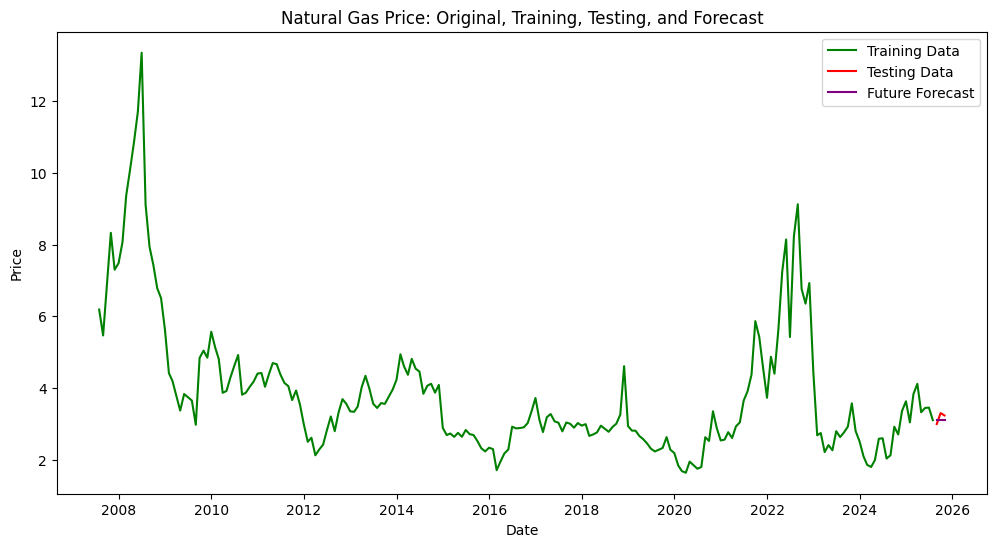

In [63]:
# Get the last date from the training data for each commodity
last_oil_date = oil_train.index[-1]
last_copper_date = copper_train.index[-1]
last_silver_date = silver_train.index[-1]
last_gold_date = gold_train.index[-1]
last_natural_gas_date = natural_gas_train.index[-1]


# Generate future dates for the forecast period (monthly frequency)
# oil_forecast_dates = pd.date_range(start=last_oil_date + pd.DateOffset(months=1), periods=n_forecast, freq='MS')
oil_forecast_dates = pd.date_range(start=(last_oil_date + pd.DateOffset(months=1)) + pd.offsets.MonthEnd(0), periods=n_forecast, freq='MS')
copper_forecast_dates = pd.date_range(start=last_copper_date + pd.DateOffset(months=1)+ pd.offsets.MonthEnd(0), periods=n_forecast, freq='MS')
silver_forecast_dates = pd.date_range(start=last_silver_date + pd.DateOffset(months=1)+ pd.offsets.MonthEnd(0), periods=n_forecast, freq='MS')
gold_forecast_dates = pd.date_range(start=last_gold_date + pd.DateOffset(months=1)+ pd.offsets.MonthEnd(0), periods=n_forecast, freq='MS')
natural_gas_forecast_dates = pd.date_range(start=last_natural_gas_date + pd.DateOffset(months=1)+ pd.offsets.MonthEnd(0), periods=n_forecast, freq='MS')


# Plotting for Oil
plt.figure(figsize=(12, 6))
# plt.plot(oil_data['Date'], oil_data['Close'], label='Original Data', color='blue')
plt.plot(oil_train.index, np.exp(oil_train), label='Training Data', color='green')
plt.plot(oil_test.index, np.exp(oil_test), label='Testing Data', color='red')
plt.plot(oil_forecast_dates, oil_future_forecast_original, label='Future Forecast', color='purple')
plt.title('Oil Price: Original, Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting for Copper
plt.figure(figsize=(12, 6))
# plt.plot(copper_data['Date'], copper_data['Close'], label='Original Data', color='blue')
plt.plot(copper_train.index, np.exp(copper_train), label='Training Data', color='green')
plt.plot(copper_test.index, np.exp(copper_test), label='Testing Data', color='red')
plt.plot(copper_forecast_dates, copper_future_forecast_original, label='Future Forecast', color='purple' )
plt.title('Copper Price: Original, Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting for Silver
plt.figure(figsize=(12, 6))
# plt.plot(silver_data['Date'], silver_data['Close'], label='Original Data', color='blue')
plt.plot(silver_train.index, np.exp(silver_train), label='Training Data', color='green')
plt.plot(silver_test.index, np.exp(silver_test), label='Testing Data', color='red')
plt.plot(silver_forecast_dates, silver_future_forecast_original, label='Future Forecast', color='purple' )
plt.title('Silver Price: Original, Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting for Gold
plt.figure(figsize=(12, 6))
# plt.plot(gold_data['Date'], gold_data['Close'], label='Original Data', color='blue')
plt.plot(gold_train.index, np.exp(gold_train), label='Training Data', color='green')
plt.plot(gold_test.index, np.exp(gold_test), label='Testing Data', color='red')
plt.plot(gold_forecast_dates, gold_future_forecast_original, label='Future Forecast', color='purple' )
plt.title('Gold Price: Original, Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting for Natural Gas
plt.figure(figsize=(12, 6))
# plt.plot(natural_gas_data['Date'], natural_gas_data['Close'], label='Original Data', color='blue')
plt.plot(natural_gas_train.index, np.exp(natural_gas_train), label='Training Data', color='green')
plt.plot(natural_gas_test.index, np.exp(natural_gas_test), label='Testing Data', color='red')
plt.plot(natural_gas_forecast_dates, natural_gas_future_forecast_original, label='Future Forecast', color='purple' )
plt.title('Natural Gas Price: Original, Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Ahora usaremos Cross validation para el entrenamiento


## Entrenamiento de modelos mensuales con validación cruzada

Aplicar la función `train_model_with_cross_validation` para entrenar modelos SARIMAX para cada commodity mensual utilizando validación cruzada con `TimeSeriesSplit`.

In [64]:
# Primero definimos la función que recibe por parámetros
# los datos y sus configuraciones

# Pequeña función solo para formatear la salida de decimales a 4
def format_metrics(metric_list):
    return [float(f"{m:.4f}") for m in metric_list]

def train_model_with_cross_validation(y: pd.Series, exog: pd.DataFrame, p, d, q, P, D, Q, m):
    # Drop NaNs from the target variable first
    y_cleaned = y.dropna()

    # Reindex exog to align with the cleaned target variable and drop NaNs
    exog_cleaned = exog.reindex(y_cleaned.index).dropna()

    # Ensure both y and exog still have data after cleaning and alignment
    if len(y_cleaned) == 0 or len(exog_cleaned) == 0 or len(y_cleaned) != len(exog_cleaned):
        print("Error: Data is empty or lengths do not match after cleaning and alignment.")
        return None, [], [], []

    print(f"Cleaned y length: {len(y_cleaned)}")
    print(f"Cleaned exog length: {len(exog_cleaned)}")


    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []
    mse_scores = []
    mae_scores = []

    # Split using TimeSeriesSplit on the cleaned target variable
    for fold, (train_index, test_index) in enumerate(tscv.split(y_cleaned)):
        y_train, y_test = y_cleaned.iloc[train_index], y_cleaned.iloc[test_index]

        # Use the indices from the split to select the corresponding exog data
        exog_train = exog_cleaned.iloc[train_index]
        exog_test = exog_cleaned.iloc[test_index]


        print(f"Fold {fold + 1}: y_train shape: {y_train.shape}, exog_train shape: {exog_train.shape}")
        print(f"Fold {fold + 1}: y_test shape: {y_test.shape}, exog_test shape: {exog_test.shape}")


        # Entrenar SARIMAX con variables exógenas
        # Ensure exog_train is not empty before fitting
        if not y_train.empty and not y_test.empty and not exog_train.empty and not exog_test.empty:
          try:
            model = SARIMAX(y_train, exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, m))
            result = model.fit(disp=False)

            # Predecir en fold de prueba usando exógenas de test
            pred = result.get_prediction(start=y_test.index[0], end=y_test.index[-1], exog=exog_test)
            y_pred = pred.predicted_mean

            # Calcular RMSE para este fold
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            rmse_scores.append(rmse)

            # Calcular MSE para este fold
            mse = mean_squared_error(y_test, y_pred)
            mse_scores.append(mse)

            # Calcular MAE para este fold
            mae = mean_absolute_error(y_test, y_pred)
            mae_scores.append(mae)

            # Formatear resultados con 4 decimales
            # Format metrics after each fold calculation
            # Note: This will format the list in place after each fold
            rmse_scores = format_metrics(rmse_scores)
            mse_scores = format_metrics(mse_scores)
            mae_scores = format_metrics(mae_scores)

          except Exception as e:
              print(f"Fold {fold + 1}: Error during model fitting or prediction: {e}")
              # Optionally, append NaN or a large value to scores to indicate failure
              # rmse_scores.append(np.nan)
              # mse_scores.append(np.nan)
              # mae_scores.append(np.nan)
        else:
            print(f"Fold {fold + 1}: Skipping model fitting and evaluation due to empty data in split.")


    # Retornar el último modelo entrenado y las métricas de validación cruzada
    # Return empty lists if no scores were appended (e.g., due to errors or empty folds)
    if not rmse_scores:
        return None, [], [], []
    return result, rmse_scores, mse_scores, mae_scores

# Ejecutar la validación cruzada para cada commodity mensual
oil_model_cv, oil_rmse_cv, oil_mse_cv, oil_mae_cv = train_model_with_cross_validation(
    oil_train.iloc[:, 0], oil_data_exog,
    best_oil_model.order[0], best_oil_model.order[1], best_oil_model.order[2],
    best_oil_model.seasonal_order[0], best_oil_model.seasonal_order[1],
    best_oil_model.seasonal_order[2], best_oil_model.seasonal_order[3]
)

copper_model_cv, copper_rmse_cv, copper_mse_cv, copper_mae_cv = train_model_with_cross_validation(
    copper_train.iloc[:, 0], copper_data_exog,
    best_copper_model.order[0], best_copper_model.order[1], best_copper_model.order[2],
    best_copper_model.seasonal_order[0], best_copper_model.seasonal_order[1],
    best_copper_model.seasonal_order[2], best_copper_model.seasonal_order[3]
)

silver_model_cv, silver_rmse_cv, silver_mse_cv, silver_mae_cv = train_model_with_cross_validation(
    silver_train.iloc[:, 0], silver_data_exog,
    best_silver_model.order[0], best_silver_model.order[1], best_silver_model.order[2],
    best_silver_model.seasonal_order[0], best_silver_model.seasonal_order[1],
    best_silver_model.seasonal_order[2], best_silver_model.seasonal_order[3]
)

gold_model_cv, gold_rmse_cv, gold_mse_cv, gold_mae_cv = train_model_with_cross_validation(
    gold_train.iloc[:, 0], gold_data_exog,
    best_gold_model.order[0], best_gold_model.order[1], best_gold_model.order[2],
    best_gold_model.seasonal_order[0], best_gold_model.seasonal_order[1],
    best_gold_model.seasonal_order[2], best_gold_model.seasonal_order[3]
)

natural_gas_model_cv, natural_gas_rmse_cv, natural_gas_mse_cv, natural_gas_mae_cv = train_model_with_cross_validation(
    natural_gas_train.iloc[:, 0], natural_gas_data_exog,
    best_natural_gas_model.order[0], best_natural_gas_model.order[1], best_natural_gas_model.order[2],
    best_natural_gas_model.seasonal_order[0], best_natural_gas_model.seasonal_order[1],
    best_natural_gas_model.seasonal_order[2], best_natural_gas_model.seasonal_order[3]
)

# Resultados
print("\nMétricas de validación cruzada (RMSE, MSE, MAE) para cada commodity:")
if oil_model_cv is not None:
    print(f"Oil CV RMSEs: {oil_rmse_cv}, Mean: {np.mean(oil_rmse_cv):.4f}")
    print(f"Oil CV MSEs: {oil_mse_cv}, Mean: {np.mean(oil_mse_cv):.4f}")
    print(f"Oil CV MAEs: {oil_mae_cv}, Mean: {np.mean(oil_mae_cv):.4f}")
else:
    print("Oil CV: Could not train model due to data issues.")
print("-" * 50)

if copper_model_cv is not None:
    print(f"Copper CV RMSEs: {copper_rmse_cv}, Mean: {np.mean(copper_rmse_cv):.4f}")
    print(f"Copper CV MSEs: {copper_mse_cv}, Mean: {np.mean(copper_mse_cv):.4f}")
    print(f"Copper CV MAEs: {copper_mae_cv}, Mean: {np.mean(copper_mae_cv):.4f}")
else:
    print("Copper CV: Could not train model due to data issues.")
print("-" * 50)

if silver_model_cv is not None:
    print(f"Silver CV RMSEs: {silver_rmse_cv}, Mean: {np.mean(silver_rmse_cv):.4f}")
    print(f"Silver CV MSEs: {silver_mse_cv}, Mean: {np.mean(silver_mse_cv):.4f}")
    print(f"Silver CV MAEs: {silver_mae_cv}, Mean: {np.mean(silver_mae_cv):.4f}")
else:
    print("Silver CV: Could not train model due to data issues.")
print("-" * 50)

if gold_model_cv is not None:
    print(f"Gold CV RMSEs: {gold_rmse_cv}, Mean: {np.mean(gold_rmse_cv):.4f}")
    print(f"Gold CV MSEs: {gold_mse_cv}, Mean: {np.mean(gold_mse_cv):.4f}")
    print(f"Gold CV MAEs: {gold_mae_cv}, Mean: {np.mean(gold_mae_cv):.4f}")
else:
    print("Gold CV: Could not train model due to data issues.")
print("-" * 50)

if natural_gas_model_cv is not None:
    print(f"Natural Gas CV RMSEs: {natural_gas_rmse_cv}, Mean: {np.mean(natural_gas_rmse_cv):.4f}")
    print(f"Natural Gas CV MSEs: {natural_gas_mse_cv}, Mean: {np.mean(natural_gas_mse_cv):.4f}")
    print(f"Natural Gas CV MAEs: {natural_gas_mae_cv}, Mean: {np.mean(natural_gas_mae_cv):.4f}")
else:
    print("Natural Gas CV: Could not train model due to data issues.")
print("-" * 50)

Cleaned y length: 215
Cleaned exog length: 215
Fold 1: y_train shape: (40,), exog_train shape: (40, 2)
Fold 1: y_test shape: (35,), exog_test shape: (35, 2)
Fold 2: y_train shape: (75,), exog_train shape: (75, 2)
Fold 2: y_test shape: (35,), exog_test shape: (35, 2)
Fold 3: y_train shape: (110,), exog_train shape: (110, 2)
Fold 3: y_test shape: (35,), exog_test shape: (35, 2)
Fold 3: Error during model fitting or prediction: Provided exogenous values are not of the appropriate shape. Required (36, 2), got (35, 2).
Fold 4: y_train shape: (145,), exog_train shape: (145, 2)
Fold 4: y_test shape: (35,), exog_test shape: (35, 2)
Fold 4: Error during model fitting or prediction: 'The `start` argument could not be matched to a location related to the index of the data.'
Fold 5: y_train shape: (180,), exog_train shape: (180, 2)
Fold 5: y_test shape: (35,), exog_test shape: (35, 2)
Fold 5: Error during model fitting or prediction: 'The `start` argument could not be matched to a location related

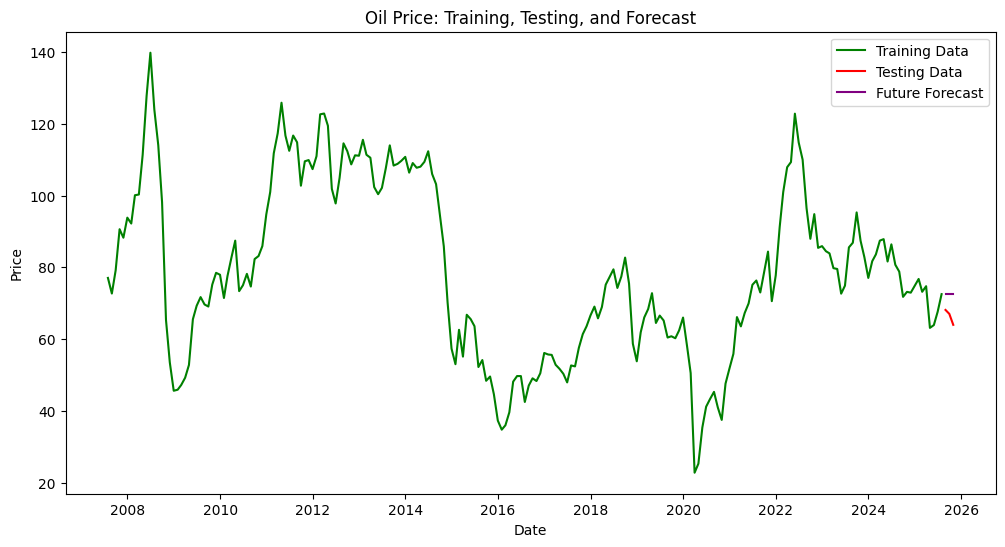

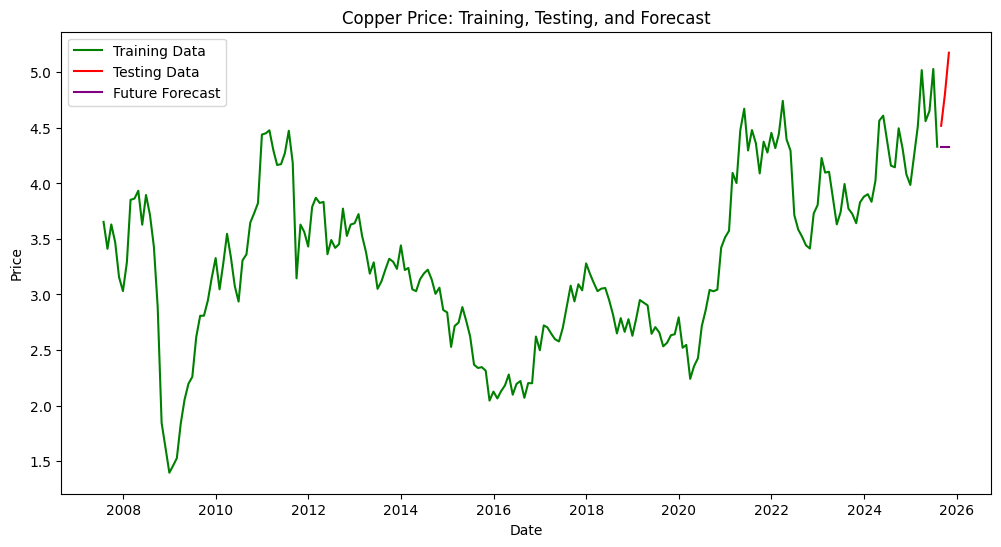

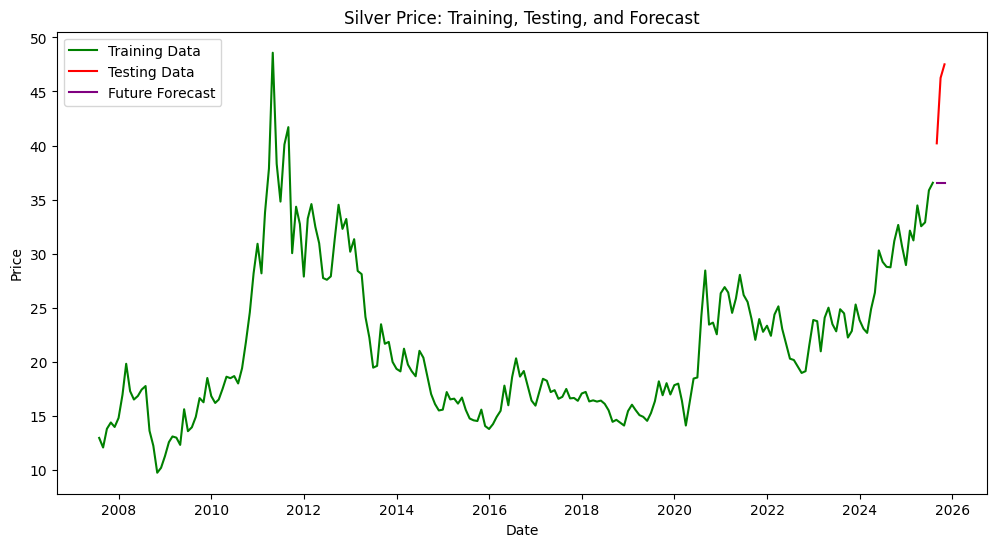

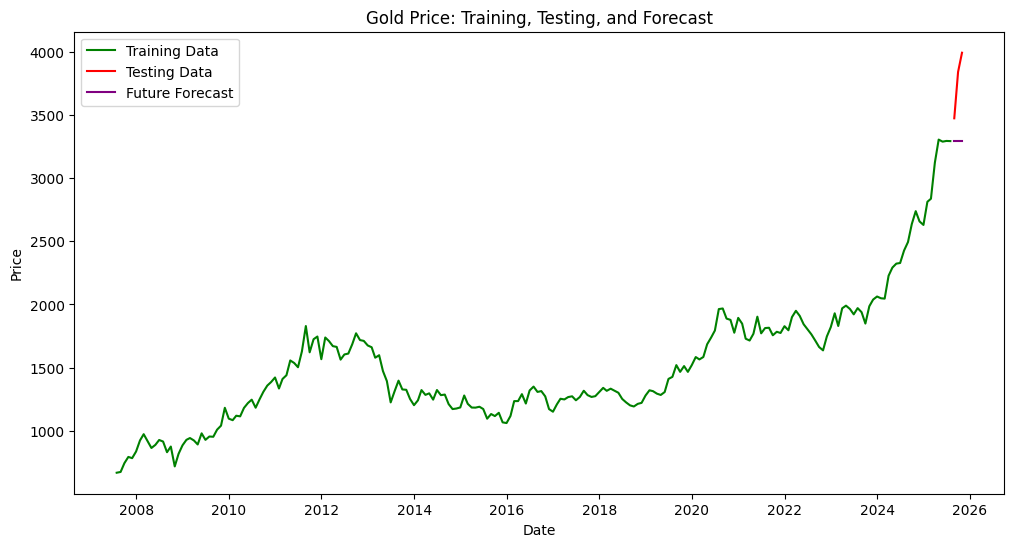

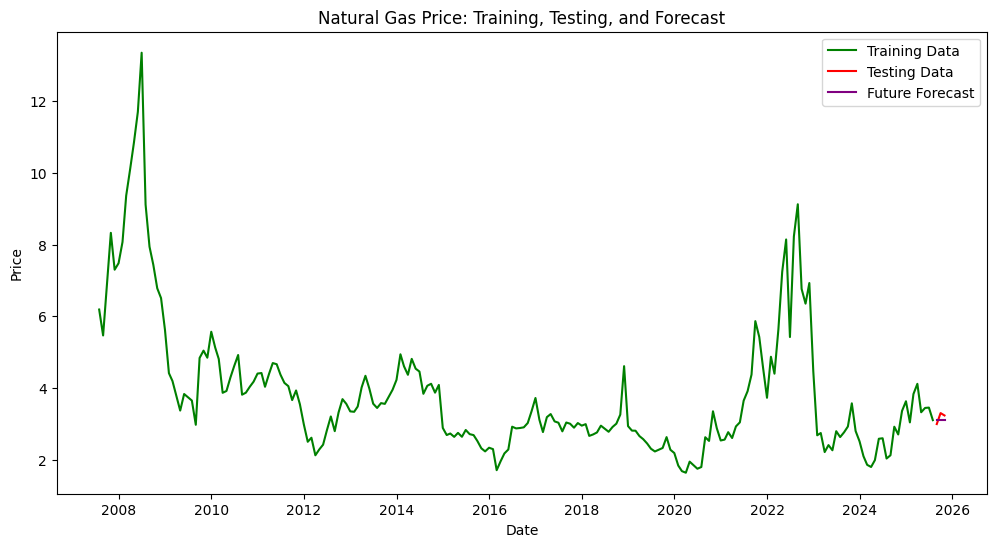

In [65]:
# Specify the number of future time steps for forecasting (should match the forecast length)
n_forecast = 3 # Assuming n_forecast is still 3 from previous cells

# Get the last date from the training data for each commodity
last_oil_date = oil_train.index[-1]
last_copper_date = copper_train.index[-1]
last_silver_date = silver_train.index[-1]
last_gold_date = gold_train.index[-1]
last_natural_gas_date = natural_gas_train.index[-1]

# Generate future dates for the forecast period (monthly frequency)
oil_forecast_dates = pd.date_range(start=last_oil_date + pd.DateOffset(months=1) + pd.offsets.MonthEnd(0), periods=n_forecast, freq='MS')
copper_forecast_dates = pd.date_range(start=last_copper_date + pd.DateOffset(months=1) + pd.offsets.MonthEnd(0), periods=n_forecast, freq='MS')
silver_forecast_dates = pd.date_range(start=last_silver_date + pd.DateOffset(months=1) + pd.offsets.MonthEnd(0), periods=n_forecast, freq='MS')
gold_forecast_dates = pd.date_range(start=last_gold_date + pd.DateOffset(months=1) + pd.offsets.MonthEnd(0), periods=n_forecast, freq='MS')
natural_gas_forecast_dates = pd.date_range(start=last_natural_gas_date + pd.DateOffset(months=1) + pd.offsets.MonthEnd(0), periods=n_forecast, freq='MS')

# Plotting for Oil
plt.figure(figsize=(12, 6))
plt.plot(oil_train.index, np.exp(oil_train), label='Training Data', color='green')
plt.plot(oil_test.index, np.exp(oil_test), label='Testing Data', color='red')
# Ensure the length of forecast dates matches the forecast values
if len(oil_forecast_dates) == len(oil_future_forecast_original):
    plt.plot(oil_forecast_dates, oil_future_forecast_original, label='Future Forecast', color='purple')
else:
    print("Warning: Length of oil_forecast_dates and oil_future_forecast_original do not match.")
plt.title('Oil Price: Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting for Copper
plt.figure(figsize=(12, 6))
plt.plot(copper_train.index, np.exp(copper_train), label='Training Data', color='green')
plt.plot(copper_test.index, np.exp(copper_test), label='Testing Data', color='red')
if len(copper_forecast_dates) == len(copper_future_forecast_original):
    plt.plot(copper_forecast_dates, copper_future_forecast_original, label='Future Forecast', color='purple')
else:
    print("Warning: Length of copper_forecast_dates and copper_future_forecast_original do not match.")
plt.title('Copper Price: Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting for Silver
plt.figure(figsize=(12, 6))
plt.plot(silver_train.index, np.exp(silver_train), label='Training Data', color='green')
plt.plot(silver_test.index, np.exp(silver_test), label='Testing Data', color='red')
if len(silver_forecast_dates) == len(silver_future_forecast_original):
     plt.plot(silver_forecast_dates, silver_future_forecast_original, label='Future Forecast', color='purple')
else:
    print("Warning: Length of silver_forecast_dates and silver_future_forecast_original do not match.")
plt.title('Silver Price: Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting for Gold
plt.figure(figsize=(12, 6))
plt.plot(gold_train.index, np.exp(gold_train), label='Training Data', color='green')
plt.plot(gold_test.index, np.exp(gold_test), label='Testing Data', color='red')
if len(gold_forecast_dates) == len(gold_future_forecast_original):
    plt.plot(gold_forecast_dates, gold_future_forecast_original, label='Future Forecast', color='purple')
else:
    print("Warning: Length of gold_forecast_dates and gold_future_forecast_original do not match.")
plt.title('Gold Price: Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting for Natural Gas
plt.figure(figsize=(12, 6))
plt.plot(natural_gas_train.index, np.exp(natural_gas_train), label='Training Data', color='green')
plt.plot(natural_gas_test.index, np.exp(natural_gas_test), label='Testing Data', color='red')
if len(natural_gas_forecast_dates) == len(natural_gas_future_forecast_original):
    plt.plot(natural_gas_forecast_dates, natural_gas_future_forecast_original, label='Future Forecast', color='purple')
else:
    print("Warning: Length of natural_gas_forecast_dates and natural_gas_future_forecast_original do not match.")
plt.title('Natural Gas Price: Training, Testing, and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Resumen del Análisis de Series Temporales Mensuales de Commodities

Este análisis se centró en el estudio y pronóstico de los precios mensuales de cinco commodities: petróleo Brent, cobre, plata, oro y gas natural, utilizando modelos SARIMA con variables exógenas.

Los pasos clave realizados fueron:

1.  **Carga y preparación de datos:** Se cargaron los datos mensuales de los commodities y sus variables exógenas asociadas desde archivos parquet. Se realizó una limpieza básica eliminando duplicados y filas con valores nulos en las series de precios principales.
2.  **Transformación logarítmica:** Se aplicó una transformación logarítmica a las series de precios de los commodities. Esto se hizo después de determinar que los modelos de descomposición multiplicativa se ajustaban mejor a los datos (basado en la menor varianza de los residuos), lo que sugiere que la varianza de las series originales es proporcional al nivel del precio. La transformación logarítmica ayuda a estabilizar la varianza y a hacer que la relación entre los componentes de la serie temporal sea más aditiva, lo cual es beneficioso para los modelos SARIMA.
3.  **División de datos:** Las series temporales transformadas (y sus variables exógenas correspondientes) se dividieron en conjuntos de entrenamiento y prueba para la evaluación del modelo.
4.  **Optimización de parámetros SARIMA:** Se utilizó `pmdarima.auto_arima` con el criterio de información AIC para encontrar automáticamente los mejores órdenes (p, d, q) y órdenes estacionales (P, D, Q, m) para el modelo SARIMA para cada commodity, basado en los datos de entrenamiento.
5.  **Entrenamiento y Evaluación del Modelo SARIMA:** Se entrenaron modelos SARIMAX (SARIMA con exógenas) para cada commodity utilizando los datos de entrenamiento y las variables exógenas seleccionadas. Se realizó una evaluación inicial en el conjunto de prueba calculando métricas como MSE, RMSE y MAE para cada commodity.
6.  **Validación Cruzada:** Se implementó un enfoque de validación cruzada con `TimeSeriesSplit` para evaluar la robustez y el rendimiento del modelo SARIMAX en diferentes divisiones temporales de los datos de entrenamiento. Se calcularon las métricas de rendimiento (RMSE, MSE, MAE) para cada fold y se mostraron los resultados promedio para cada commodity.
7.  **Pronóstico y Visualización:** Se generaron pronósticos futuros para cada commodity utilizando los modelos SARIMA entrenados. Los pronósticos se transformaron de nuevo a la escala original aplicando la función exponencial. Finalmente, se visualizaron las series temporales originales, los datos de entrenamiento, los datos de prueba y los pronósticos futuros en sus escalas originales para cada commodity.

En resumen, el análisis ha permitido identificar las características de las series temporales de commodities (naturaleza multiplicativa), aplicar una transformación adecuada para el modelado, y entrenar y evaluar modelos SARIMAX utilizando tanto una división simple train/test como validación cruzada para obtener una estimación más fiable del rendimiento del modelo antes de generar pronósticos futuros.



---

